In [122]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('indicadores-provinciales.csv', encoding='cp1252')

In [137]:
df_pbg = df[(df['actividad_producto_nombre'] == 'PBG Total')]

In [138]:
df_pbg['indice_tiempo'] = pd.to_datetime(df_pbg['indice_tiempo'])

c:\Users\tinmb\miniconda3\envs\pida\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [139]:
df_pbg.set_index('indice_tiempo', inplace=True)

In [140]:
df_pbg.unidad_de_medida.unique()

array(['miles de pesos a precios corrientes',
       'miles de pesos a precios de 1993',
       'miles de pesos a precios de 2004'], dtype=object)

In [165]:
df_pesos_2004 = df_pbg[(df_pbg['unidad_de_medida'] == 'miles de pesos a precios de 2004')][['alcance_nombre', 'valor']].pivot(columns='alcance_nombre', values='valor')

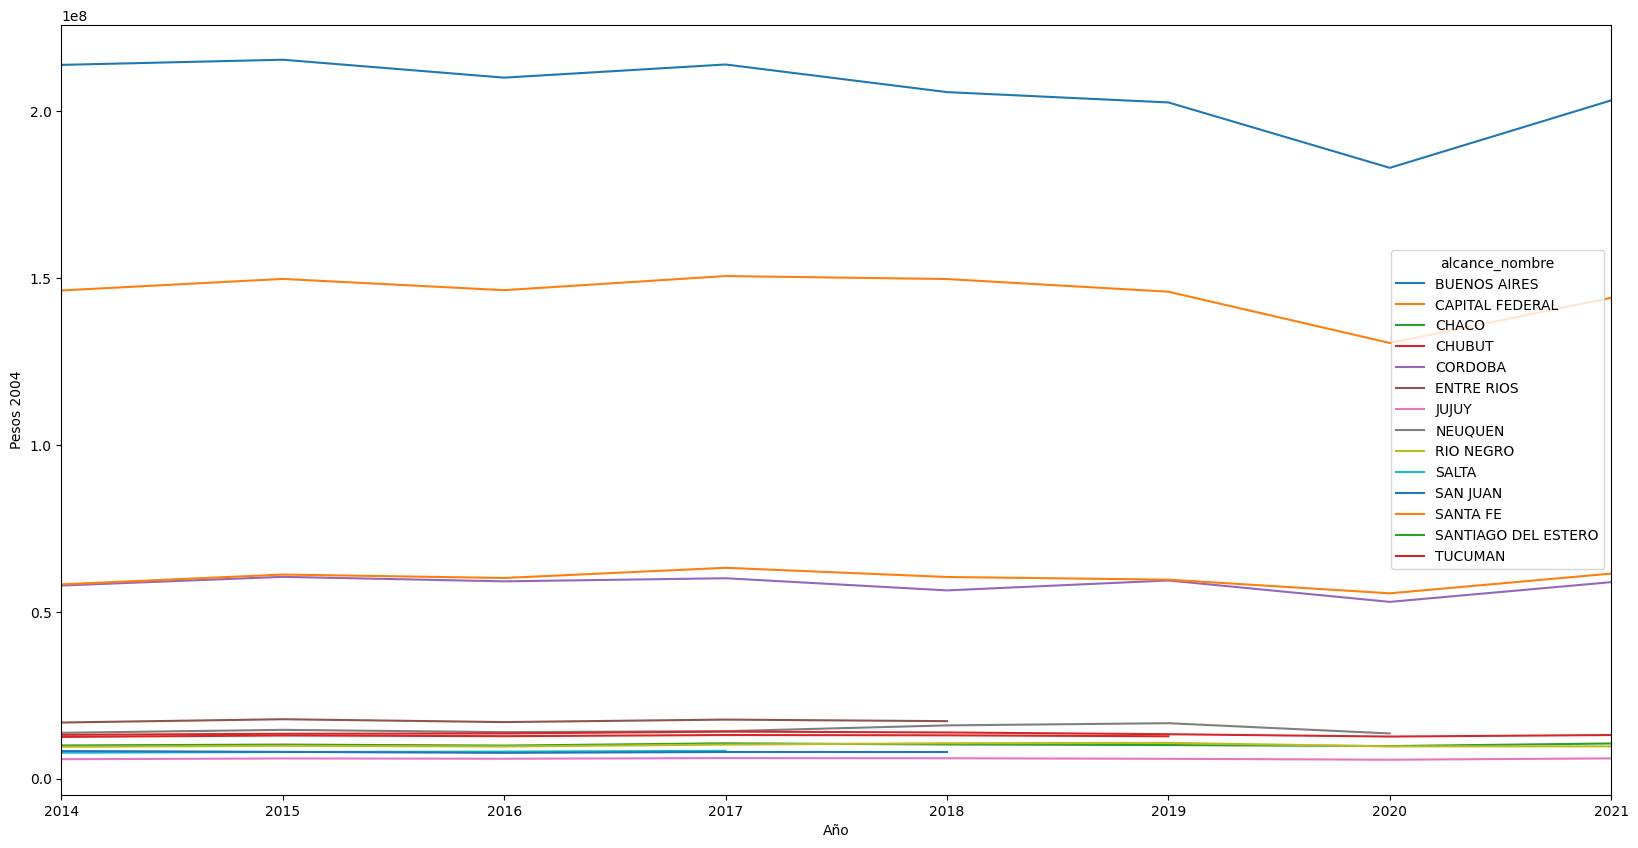

In [168]:
ax = df_pesos_2004['2014':].plot()
fig = plt.gcf()
fig.set_size_inches(20, 10)
ax.set_ylabel('Pesos 2004')
ax.set_xlabel('Año')
ax.set_figsize=(10,5)
plt.show()

In [142]:
df_pesos_corrientes = df_pbg[(df_pbg['unidad_de_medida'] == 'miles de pesos a precios corrientes')][['alcance_nombre', 'valor']].pivot(columns='alcance_nombre', values='valor')

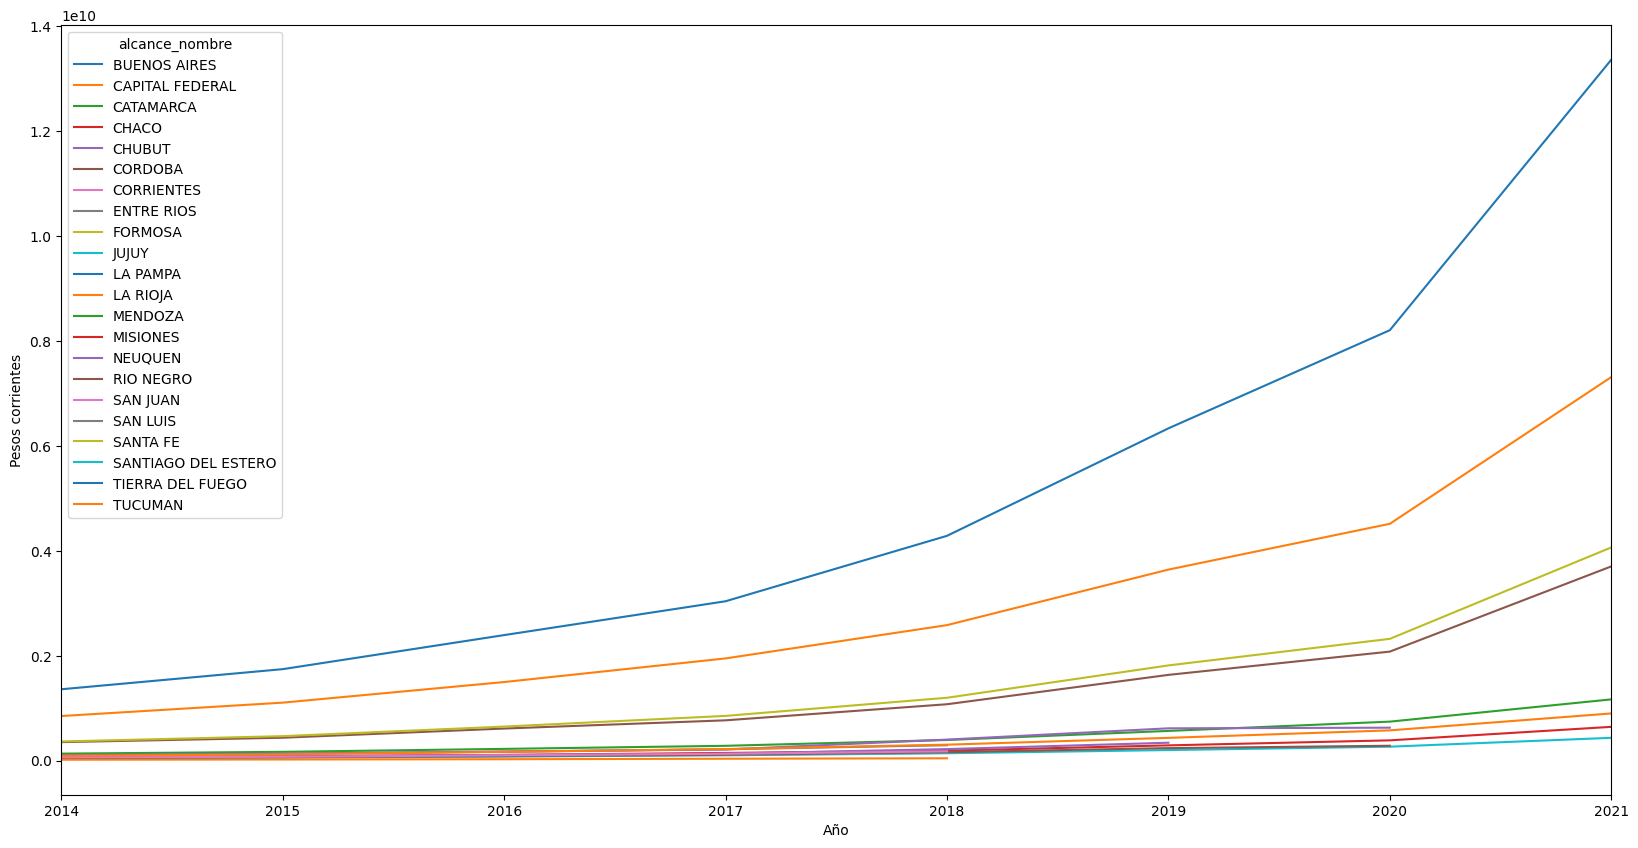

In [161]:
ax = df_pesos_corrientes['2014':].plot()
fig = plt.gcf()
fig.set_size_inches(20, 10)
ax.set_ylabel('Pesos corrientes')
ax.set_xlabel('Año')
ax.set_figsize=(10,5)
plt.show()

# Ahora extraemos las proyecciones de poblacion

In [169]:
df_poblacion = df[(df['actividad_producto_nombre'] == 'Población')]

In [176]:
df_poblacion = df_poblacion[['alcance_nombre', 'valor', 'indice_tiempo']].pivot(columns='alcance_nombre', values='valor', index='indice_tiempo')

In [181]:
df_poblacion = df_poblacion['2014':]

In [179]:
df_pesos_2004 = df_pesos_2004['2014':]

In [182]:
df_pesos_2004.dropna(axis=1, how='all', inplace=True)

c:\Users\tinmb\miniconda3\envs\pida\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [183]:
df_pesos_2004

alcance_nombre,BUENOS AIRES,CAPITAL FEDERAL,CHACO,CHUBUT,CORDOBA,ENTRE RIOS,JUJUY,NEUQUEN,RIO NEGRO,SALTA,SAN JUAN,SANTA FE,TUCUMAN
indice_tiempo,,,,,,,,,,,,,
2014-01-01,2.139721e+08,1.463378e+08,9.912447e+06,1.247035e+07,5.786225e+07,16791357.0,5.795778e+06,1.370865e+07,9.511339e+06,7732300.0,8242000.0,5.821698e+07,1.309563e+07
2015-01-01,2.155238e+08,1.498046e+08,1.017839e+07,1.290207e+07,6.047268e+07,17778645.0,6.017717e+06,1.459678e+07,9.805172e+06,7941700.0,7989000.0,6.115717e+07,1.342110e+07
2016-01-01,2.101493e+08,1.464225e+08,9.877740e+06,1.270274e+07,5.912249e+07,16920787.0,5.931295e+06,1.390650e+07,9.603665e+06,8073900.0,7704000.0,6.012978e+07,1.351656e+07
2017-01-01,2.140955e+08,1.506592e+08,1.055592e+07,1.303972e+07,6.005072e+07,17671807.0,6.131640e+06,1.419310e+07,1.017138e+07,8294100.0,7957000.0,6.318639e+07,1.406972e+07
2018-01-01,2.058124e+08,1.497672e+08,1.021560e+07,1.295404e+07,5.640985e+07,17199456.0,6.072701e+06,1.593101e+07,1.058136e+07,NaN,7952000.0,6.042692e+07,1.381259e+07
2019-01-01,2.027134e+08,1.459611e+08,1.003081e+07,1.266930e+07,5.938010e+07,NaN,5.910886e+06,1.658962e+07,1.068708e+07,NaN,NaN,5.963219e+07,1.328452e+07
2020-01-01,1.831086e+08,1.305884e+08,9.728430e+06,NaN,5.297062e+07,NaN,5.638358e+06,1.351522e+07,9.634335e+06,NaN,NaN,5.553515e+07,1.258411e+07
2021-01-01,2.033441e+08,1.441462e+08,1.051545e+07,NaN,5.888392e+07,NaN,6.038750e+06,NaN,9.650170e+06,NaN,NaN,6.144832e+07,1.304226e+07


In [189]:
df_pesos_2004.to_csv('pbg_provincias.csv')

In [190]:
df_poblacion.to_csv('poblacion_provincias.csv')